#in this simple notebook i will try to estimate an equation for the year and the energy output of the world

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


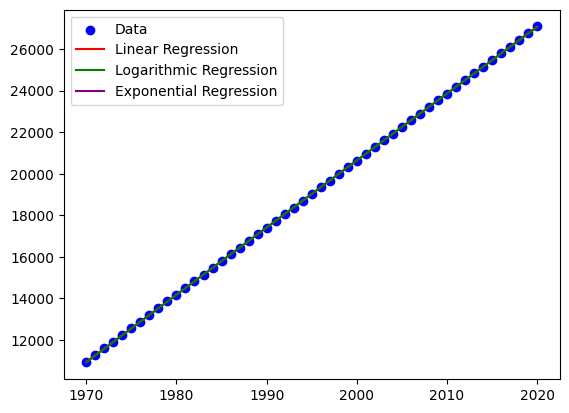

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example dataframe
import pandas as pd
#x= year y= energy output in gigawatts 
df = pd.DataFrame({
    'x': [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
             1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
             2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             2020],
    'y': [10956, 11277, 11600, 11922, 12245, 12567, 12890, 13212, 13535, 13857,
                                  14180, 14502, 14825, 15147, 15470, 15792, 16115, 16437, 16760, 17082,
                                  17405, 17727, 18050, 18372, 18695, 19017, 19340, 19662, 19985, 20307,
                                  20630, 20952, 21275, 21597, 21920, 22242, 22565, 22887, 23210, 23532,
                                  23855, 24177, 24500, 24822, 25145, 25467, 25790, 26112, 26435, 26757,
                                  27080]
})

# Function for linear regression
def linear_func(x, a, b):
    return a * x + b

# Function for logarithmic regression
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

# Function for trigonometric regression
def trigonometric_func(x, a, b, c):
    return a * np.sin(b * x) + c

# Function for exponential regression
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Function for power regression
def power_func(x, a, b):
    return a * np.power(x, b)

# Function for non-linear regression
def nonlinear_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Perform linear regression
linear_params, _ = curve_fit(linear_func, df['x'], df['y'],maxfev=100000000)
df['linear_regression'] = linear_func(df['x'], *linear_params)

# Perform logarithmic regression
logarithmic_params, _ = curve_fit(logarithmic_func, df['x'], df['y'],maxfev=100000000)
df['logarithmic_regression'] = logarithmic_func(df['x'], *logarithmic_params)

# Perform trigonometric regression
trigonometric_params, _ = curve_fit(trigonometric_func, df['x'], df['y'],maxfev=100000000)
df['trigonometric_regression'] = trigonometric_func(df['x'], *trigonometric_params)

# Perform exponential regression
exponential_params, _ = curve_fit(exponential_func, df['x'], df['y'],maxfev=100000000)
df['exponential_regression'] = exponential_func(df['x'], *exponential_params)

# Perform power regression
power_params, _ = curve_fit(power_func, df['x'], df['y'],maxfev=100000000)
df['power_regression'] = power_func(df['x'], *power_params)

# Perform non-linear regression with higher maxfev
nonlinear_params, _ = curve_fit(nonlinear_func, df['x'], df['y'], p0=[1, 0.1, 1], maxfev=100000000)
df['nonlinear_regression'] = nonlinear_func(df['x'], *nonlinear_params)

# Calculate absolute errors
df['linear_error'] = np.abs(df['y'] - df['linear_regression'])
df['logarithmic_error'] = np.abs(df['y'] - df['logarithmic_regression'])
df['trigonometric_error'] = np.abs(df['y'] - df['trigonometric_regression'])
df['exponential_error'] = np.abs(df['y'] - df['exponential_regression'])
df['power_error'] = np.abs(df['y'] - df['power_regression'])
df['nonlinear_error'] = np.abs(df['y'] - df['nonlinear_regression'])

# Print the dataframe
df

# Plot the data and regression lines
plt.scatter(df['x'], df['y'], label='Data', color='blue')
plt.plot(df['x'], df['linear_regression'], label='Linear Regression', color='red')
plt.plot(df['x'], df['logarithmic_regression'], label='Logarithmic Regression', color='green')
#plt.plot(df['x'], df['trigonometric_regression'], label='Trigonometric Regression', color='orange')
plt.plot(df['x'], df['exponential_regression'], label='Exponential Regression', color='purple')
#plt.plot(df['x'], df['power_regression'], label='Power Regression', color='magenta')
#plt.plot(df['x'], df['nonlinear_regression'], label='Non-linear Regression', color='cyan')
plt.legend()
plt.show()


In [10]:
df

,x,y,linear_regression,logarithmic_regression,exponential_regression,linear_error,logarithmic_error,exponential_error
0,1970,10956,10954.831071,10921.754369,inf,1.168929,34.245631,inf
1,1971,11277,11277.328808,11248.247633,inf,0.328808,28.752367,inf
2,1972,11600,11599.826546,11574.575291,inf,0.173454,25.424709,inf
3,1973,11922,11922.324284,11900.737510,inf,0.324284,21.262490,inf
4,1974,12245,12244.822021,12226.734457,inf,0.177979,18.265543,inf
5,1975,12567,12567.319759,12552.566302,inf,0.319759,14.433698,inf
6,1976,12890,12889.817496,12878.233210,inf,0.182504,11.766790,inf
7,1977,13212,13212.315234,13203.735348,inf,0.315234,8.264652,inf
8,1978,13535,13534.812971,13529.072884,inf,0.187029,5.927116,inf
9,1979,13857,13857.310709,13854.245983,inf,0.310709,2.754017,inf


from this data we can assume that the linear regression is the best that suits this data

In [11]:
# Access the linear regression parameters
slope = linear_params[0]
intercept = linear_params[1]

# Print the linear regression parameters
print("Linear Regression Parameters:")
print("Slope: ", slope)
print("Intercept: ", intercept)


Linear Regression Parameters:
Slope:  322.4977375571064
Intercept:  -624365.7119166233


The equation would be in the form Y=MX +B => 
#Y=322.5X-624365.71

#Now we will build a program that finds the estimated year that we can reach the civilization type 1 ,2 and 3 and what is our estimated civilization type 

Type 1 Civilization: Approximately 10,000 terawatts (TW) or 10^16 watts, which is equivalent to 10^7 gigawatts (GW).

Type 2 Civilization: Approximately 10 billion terawatts (10^10 TW) or 10^19 watts, which is equivalent to 10^10 gigawatts (GW).

Type 3 Civilization: Approximately 10 trillion terawatts (10^13 TW) or 10^22 watts, which is equivalent to 10^13 gigawatts (GW).

In [15]:

print('our current civizliation level is =>')
Current_2023=27500
current_2023_level=(Current_2023)/10**7
print(current_2023_level)

print('we would reach level one in =>')
type1_year = ((10**7)+624365.71)/322.5
print(type1_year)

print('we would reach level two in =>')
type2_year = ((10**10)+624365.71)/322.5
print(type2_year)

print('we would reach level three in =>')
type3_year = ((10**13)+624365.71)/322.5
print(type3_year)





our current civizliation level is =>
0.00275
we would reach level one in =>
32943.76964341086
we would reach level two in =>
31009687.95568992
we would reach level three in =>
31007753874.002205
